In [9]:
import pandas as pd
from database.adatabase import ADatabase
from database.market import Market
import matplotlib.pyplot as plt
from processor.processor import Processor as p
from datetime import datetime

In [2]:
db = ADatabase("bitcoin_speculation")

In [14]:
db.connect()
recs = db.retrieve("recs")
db.disconnect()

In [15]:
market = Market()
market.connect()
crypto = market.retrieve("pdr_crypto")
market.disconnect()
crypto = p.column_date_processing(crypto)

E:\projects\longshot_venv\longshot\processor\processor.py:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data["week"] = data["date"].dt.week


In [16]:
sim = recs.merge(crypto,on=["date","ticker"],how="left")

In [17]:
sim["prediction"] = (sim["xgb_prediction"] + sim["skl_prediction"] + sim["cat_prediction"]) / 3
sim["delta"] = (sim["prediction"] - sim["adjclose"]) / sim["adjclose"]

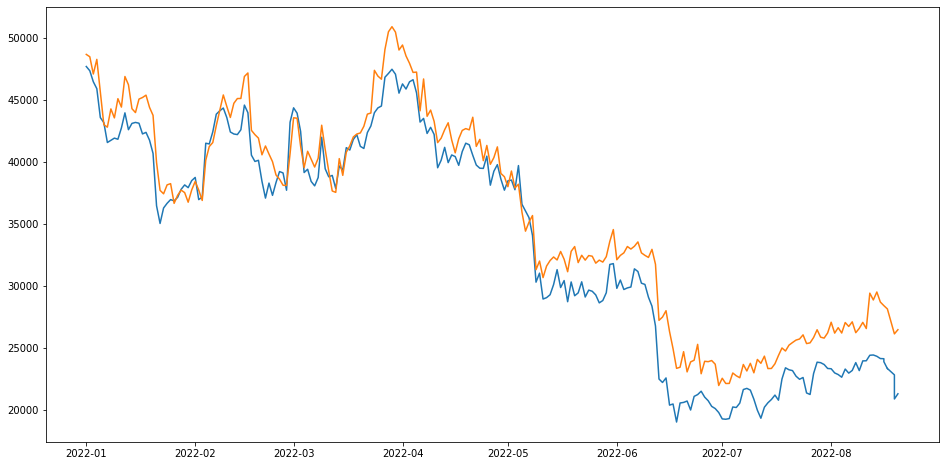

In [18]:
figure, axes = plt.subplots(figsize=(16, 8))
viz = sim[sim["date"]>=datetime(2020,1,1)]
axes.plot(viz["date"],viz["adjclose"])
axes.plot(viz["date"],viz["prediction"])
plt.show()